# Import Libraries

In [73]:
# Importing Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn import metrics
from sklearn.metrics import classification_report

import time
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Preprocessing

In [2]:
# Import Dataset

df = pd.read_csv('Group_12_data_cleaned.csv') 
df.head()

,Unnamed: 0,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,monk
0,0,0.266074,-0.165620,0.320980,0.483299,0.000000,0.273364,0.371178,0.929823,0.251173,A
1,1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,A
2,2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,A
3,3,0.031541,0.297600,-3.210528,-0.583590,0.000000,-0.307984,0.710932,1.051693,0.594169,A
4,4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,F


In [3]:
# Drop the first index column

df = df.drop(columns=['Unnamed: 0'])
df.head()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,monk
0,0.266074,-0.165620,0.320980,0.483299,0.000000,0.273364,0.371178,0.929823,0.251173,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,A
3,0.031541,0.297600,-3.210528,-0.583590,0.000000,-0.307984,0.710932,1.051693,0.594169,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,F


In [4]:
# Categorize monk variable to numerical categorical values

df['monk'].replace(['A', 'F','E','I','X','H','G','D','Y','C','W','B'],
                        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], inplace=True)
df.head()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,monk
0,0.266074,-0.165620,0.320980,0.483299,0.000000,0.273364,0.371178,0.929823,0.251173,0
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0
3,0.031541,0.297600,-3.210528,-0.583590,0.000000,-0.307984,0.710932,1.051693,0.594169,0
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,1


In [5]:
# Split data to features and labels

X = df.drop(columns=['monk'])
y = df['monk']

In [26]:
# Split data to training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

# Model Structure Selection - NonLinear SVM

In [11]:
# Perform grid search to get optimal hyperparameters for Support Vector Machine

import warnings
warnings.filterwarnings('ignore')


# defining parameter ranges
params = {'C': [ 0.1, 1, 10, 100, 1000],
         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 
  
grid = GridSearchCV(SVC(kernel='rbf'), param_grid=params, n_jobs = -1, scoring = 'accuracy')

In [12]:
start_time = time.time()
grid.fit(X_train,y_train)
print("--- Grid Search Run time: %s seconds ---" % (time.time() - start_time))

---Grid Search Run time: 896.0624740123749 seconds ---


In [13]:
print("Grid search best parameters: " , grid.best_params_)
print("Grid search highest accuracy: " , grid.best_score_)

Grid search best parameters:  {'C': 1000, 'gamma': 0.1}
Grid search highest accuracy:  0.8283584072569449


## Non-Linear SVC - Optimal Hyperparameters

In [14]:
svm = SVC(kernel='rbf',gamma=0.1, C=1000)
start_time = time.time()
svm.fit(X_train, y_train)
train_time = time.time() - start_time
print("--- Training Time: %s seconds ---" %train_time)

--- 41.801716327667236 seconds ---


In [15]:
y_pred = svm.predict(X_test)
svm_clr = classification_report(y_test, y_pred)
print(svm_clr)

svm_clr_2 = classification_report(y_test, y_pred, output_dict = True)
%store svm_clr_2

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      2572
           1       0.78      0.67      0.73      1177
           2       0.87      0.81      0.84       657
           3       0.98      0.97      0.98       499
           4       0.93      0.89      0.91       313
           5       0.80      0.72      0.76       312
           6       0.75      0.78      0.76       268
           7       0.82      0.74      0.78       211
           8       0.90      0.88      0.89       160
           9       0.91      0.82      0.86        62
          10       0.87      0.96      0.91        27
          11       1.00      0.67      0.80         3

    accuracy                           0.83      6261
   macro avg       0.87      0.82      0.84      6261
weighted avg       0.83      0.83      0.83      6261

Stored 'svm_clr_2' (dict)


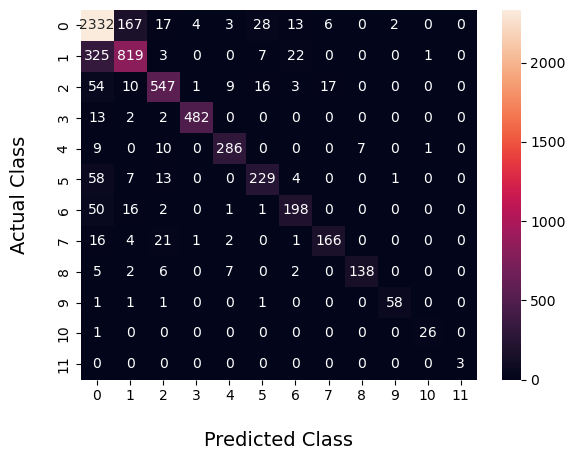

In [13]:
# Plot confusion matrix

cm = metrics.confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cm, annot=True, fmt='d', )

# set x and y label
ax.set_xlabel("Predicted Class", fontsize=14, labelpad=20)
ax.set_ylabel("Actual Class", fontsize=14, labelpad=20)
plt.savefig('svm_cm.png')

## Extreme Learning Machine

### Model Construction


In [32]:
# pip install scikit-elm

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [58]:
from skelm import ELMClassifier

In [60]:
labels = df['monk'].unique()

In [64]:
# Split data to training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [65]:
elm = ELMClassifier(classes = labels,n_neurons=200)
elm.fit(X_train,y_train)

ELMClassifier(classes=array([ 0,  1,  5,  2,  3,  8,  7,  4,  6, 10,  9, 11], dtype=int64),
              n_neurons=200)

In [66]:
y_pred = elm.predict(X_test)

In [67]:
elm_clr = classification_report(y_test, y_pred)
print(elm_clr)

elm_clr_2 = classification_report(y_test, y_pred, output_dict = True)
%store elm_clr_2

              precision    recall  f1-score   support

           0       0.61      0.92      0.73      2572
           1       0.49      0.29      0.37      1177
           2       0.58      0.58      0.58       657
           3       0.97      0.91      0.94       499
           4       0.86      0.69      0.76       313
           5       0.68      0.16      0.26       312
           6       0.70      0.16      0.26       268
           7       0.64      0.09      0.15       211
           8       0.81      0.59      0.68       160
           9       0.00      0.00      0.00        62
          10       0.50      0.04      0.07        27
          11       0.00      0.00      0.00         3

    accuracy                           0.63      6261
   macro avg       0.57      0.37      0.40      6261
weighted avg       0.63      0.63      0.59      6261

Stored 'elm_clr_2' (dict)


Text(50.722222222222214, 0.5, 'Actual Class')

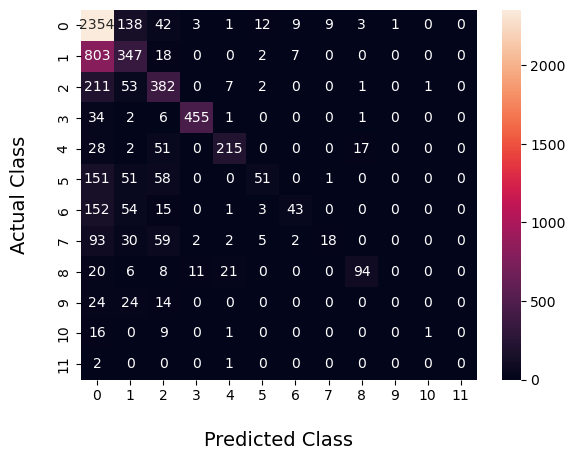

In [68]:
# Plot confusion matrix

cm = metrics.confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cm, annot=True, fmt='d', )

# set x and y label
ax.set_xlabel("Predicted Class", fontsize=14, labelpad=20)
ax.set_ylabel("Actual Class", fontsize=14, labelpad=20)
#plt.savefig('svm_cm.png')

In [71]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [75]:
# Perform grid search to get optimal hyperparameters for Support Vector Machine

import warnings
warnings.filterwarnings('ignore')

# defining parameter ranges
params = {'hidden_layer_sizes': [ (10,10), (20,), (20,20), (10,10,10)],
         'learning_rate': ['constant', 'adaptive']} 
  
grid = GridSearchCV(MLPClassifier(random_state=33, activation='relu'), param_grid=params, n_jobs = -1, scoring = 'accuracy')

In [76]:
start_time = time.time()
grid.fit(X_train,y_train)
print("--- Grid Search Run time: %s seconds ---" % (time.time() - start_time))

--- Grid Search Run time: 300.9093382358551 seconds ---


In [77]:
print("Grid search best parameters: " , grid.best_params_)
print("Grid search highest accuracy: " , grid.best_score_)

Grid search best parameters:  {'hidden_layer_sizes': (20, 20), 'learning_rate': 'constant'}
Grid search highest accuracy:  0.7672875101843409


In [80]:
#Fitting the training data to the network
mlp = MLPClassifier(hidden_layer_sizes=(20,20),activation = 'relu',random_state=33)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 20), random_state=33)

In [81]:
y_pred = mlp.predict(X_test)
mlp_clr = classification_report(y_test, y_pred)
print(mlp_clr)

mlp_clr_2 = classification_report(y_test, y_pred, output_dict = True)
%store mlp_clr_2

              precision    recall  f1-score   support

           0       0.79      0.82      0.81      2572
           1       0.71      0.68      0.69      1177
           2       0.75      0.78      0.76       657
           3       0.98      0.97      0.97       499
           4       0.87      0.89      0.88       313
           5       0.75      0.65      0.69       312
           6       0.64      0.66      0.65       268
           7       0.65      0.61      0.63       211
           8       0.96      0.81      0.88       160
           9       0.46      0.10      0.16        62
          10       0.92      0.89      0.91        27
          11       1.00      1.00      1.00         3

    accuracy                           0.78      6261
   macro avg       0.79      0.74      0.75      6261
weighted avg       0.78      0.78      0.77      6261

Stored 'mlp_clr_2' (dict)


Text(50.722222222222214, 0.5, 'Actual Class')

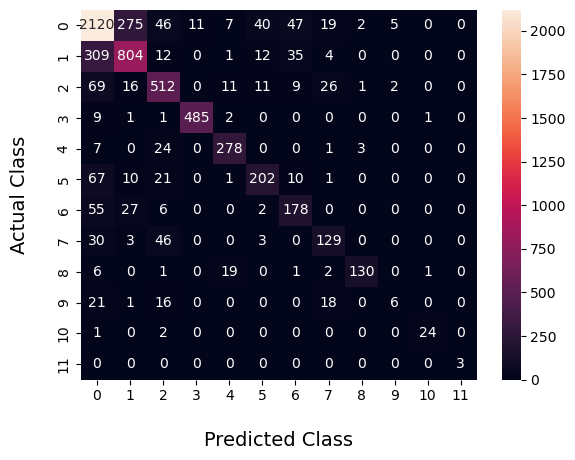

In [82]:
# Plot confusion matrix

cm = metrics.confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cm, annot=True, fmt='d', )

# set x and y label
ax.set_xlabel("Predicted Class", fontsize=14, labelpad=20)
ax.set_ylabel("Actual Class", fontsize=14, labelpad=20)
#plt.savefig('mlp_cm.png')